In [5]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import seaborn
import pandas
print('imported libraries')

imported libraries


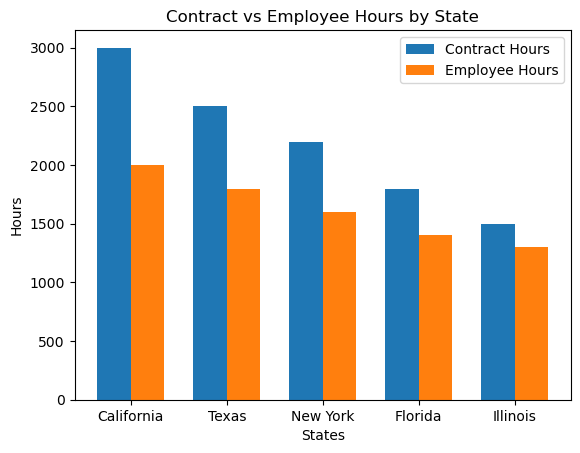

In [6]:
# Sample data for the bar chart
states = ['California', 'Texas', 'New York', 'Florida', 'Illinois']
contract_hours = [3000, 2500, 2200, 1800, 1500]
employee_hours = [2000, 1800, 1600, 1400, 1300]

# Create a figure and axis
fig, ax = plt.subplots()

# Plotting the bar chart for contract hours and employee hours
bar_width = 0.35
index = range(len(states))

# Create bars
bar1 = ax.bar(index, contract_hours, bar_width, label='Contract Hours')
bar2 = ax.bar([i + bar_width for i in index], employee_hours, bar_width, label='Employee Hours')

# Adding labels and title
ax.set_xlabel('States')
ax.set_ylabel('Hours')
ax.set_title('Contract vs Employee Hours by State')
ax.set_xticks([i + bar_width / 2 for i in index])
ax.set_xticklabels(states)

# Adding the legend
ax.legend()

# Display the chart
plt.show()


In [7]:
# Load a sample dataset (Iris dataset)
iris = load_iris()
X = iris.data  # Features
y = iris.target  # Labels

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a RandomForestClassifier model
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")


Accuracy: 100.00%


# Nursing Case Study

In [4]:
!pip install pyathena pandas

In [5]:
!pip install sqlalchemy pyathena pandas

In [8]:
from pyathena import connect
import pandas as pd

In [9]:

# Define your AWS region and S3 location for Athena query results
region_name = "us-east-1"  # Change to your AWS region
s3_staging_dir = "s3://aws-glue-assets-253490795594-us-east-1/Unsaved/"  # Change this

# Establish connection to Athena
conn = connect(
    region_name=region_name,
    s3_staging_dir=s3_staging_dir
)
query = "SHOW DATABASES;"
df = pd.read_sql(query, conn)

print("Athena Databases:")
print(df)

/tmp/ipykernel_8242/3527251622.py:11: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


Athena Databases:
  database_name
0       default
1    nursing_db
2       thyroid


In [74]:
query = 'select * from nursing_db.ownership_type_query'
data = pd.read_sql(query, conn)
print(data)

/tmp/ipykernel_12134/3166662797.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  data = pd.read_sql(query, conn)


                            ownership_type ownership_category  \
0                       Government - State         Government   
1                        Government - City         Government   
2                     Government - Federal         Government   
3              Non profit - Church related         Non-Profit   
4                 Non profit - Corporation         Non-Profit   
5                 Government - City/county         Government   
6                      Government - County         Government   
7                       Non profit - Other         Non-Profit   
8                 For profit - Partnership         For-Profit   
9   For profit - Limited Liability company         For-Profit   
10                 For profit - Individual         For-Profit   
11                For profit - Corporation         For-Profit   
12          Government - Hospital district         Government   

    avg_nurse_hours_per_resident  
0                       4.404253  
1                  

In [27]:
# Check for missing values
print(df.isnull().sum())

# Summary statistics
print(df.describe())


database_name    0
dtype: int64
       database_name
count              3
unique             3
top          default
freq               1


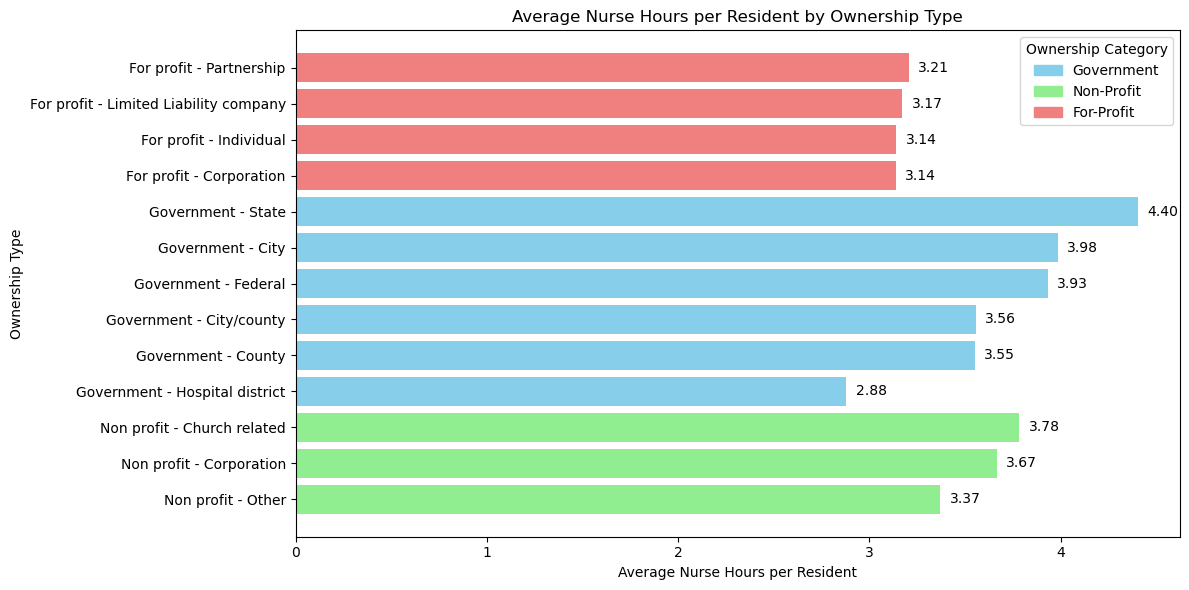

In [40]:
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.patches as mpatches

# Ensure the ownership category is in the data
data['ownership_category'] = data['ownership_category'].astype('category')

# Set up the figure size
plt.figure(figsize=(12, 6))

# Define color mapping for ownership categories
category_colors = {
    'Government': 'skyblue',
    'Non-Profit': 'lightgreen',
    'For-Profit': 'lightcoral'
}

# Map colors to the ownership_category for each row
data['color'] = data['ownership_category'].map(category_colors)

# Sort data by ownership_category and then by average nurse hours (descending)
data_sorted = data.sort_values(by=['ownership_category', 'avg_nurse_hours_per_resident'], ascending=[True, False])

# Create a horizontal bar chart with color mapping based on ownership category
bars = plt.barh(data_sorted['ownership_type'], data_sorted['avg_nurse_hours_per_resident'], color=data_sorted['color'])

# Add labels and title
plt.xlabel('Average Nurse Hours per Resident')
plt.ylabel('Ownership Type')
plt.title('Average Nurse Hours per Resident by Ownership Type')

# Invert the y-axis to have the highest values on top
plt.gca().invert_yaxis()

# Create custom legend handles using patches
legend_handles = [mpatches.Patch(color=color, label=category) for category, color in category_colors.items()]

# Add the custom legend
plt.legend(handles=legend_handles, title="Ownership Category", loc='upper right')

# Add number labels to the bars
for bar in bars:
    plt.text(bar.get_width() + 0.05, bar.get_y() + bar.get_height() / 2,
             f'{bar.get_width():.2f}', va='center', ha='left', fontsize=10)

# Display the plot
plt.tight_layout()  # Make sure everything fits in the plot
plt.show()

In [48]:
query = 'select * from nursing_db.weekday_weekend_query order by weekday_hours desc'
data = pd.read_sql(query, conn)
print(data.head())

/tmp/ipykernel_12134/918786066.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  data = pd.read_sql(query, conn)


  state  weekday_hours  weekend_hours  staffing_gap
0    AK       6.055982       6.203711     -0.147729
1    PR       4.575675       3.580473      0.995202
2    DC       4.537630       4.375979      0.161651
3    OR       4.206502       4.485882     -0.279381
4    HI       4.124039       4.275705     -0.151666


In [12]:
query = 'select * from nursing_db.weekday_weekend_query order by staffing_gap desc'
data = pd.read_sql(query, conn)
print(data)

/tmp/ipykernel_8242/2651802643.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  data = pd.read_sql(query, conn)


   state  weekday_hours  weekend_hours  staffing_gap
0     PR       4.575675       3.580473      0.995202
1     NY       3.477808       3.132059      0.345748
2     MS       3.683952       3.444507      0.239444
3     SC       3.584089       3.367578      0.216511
4     IL       3.190374       3.006040      0.184334
5     CO       3.406789       3.239942      0.166847
6     LA       3.394794       3.230106      0.164688
7     DC       4.537630       4.375979      0.161651
8     WV       3.288824       3.156663      0.132161
9     ND       3.967779       3.836121      0.131657
10    VA       3.360416       3.232301      0.128115
11    MT       3.487551       3.366965      0.120585
12    CA       4.120085       4.004265      0.115820
13    TN       3.402115       3.291706      0.110409
14    AR       3.526419       3.434550      0.091869
15    MI       3.558195       3.466795      0.091399
16    VT       3.751231       3.669136      0.082095
17    FL       3.595051       3.516634      0.

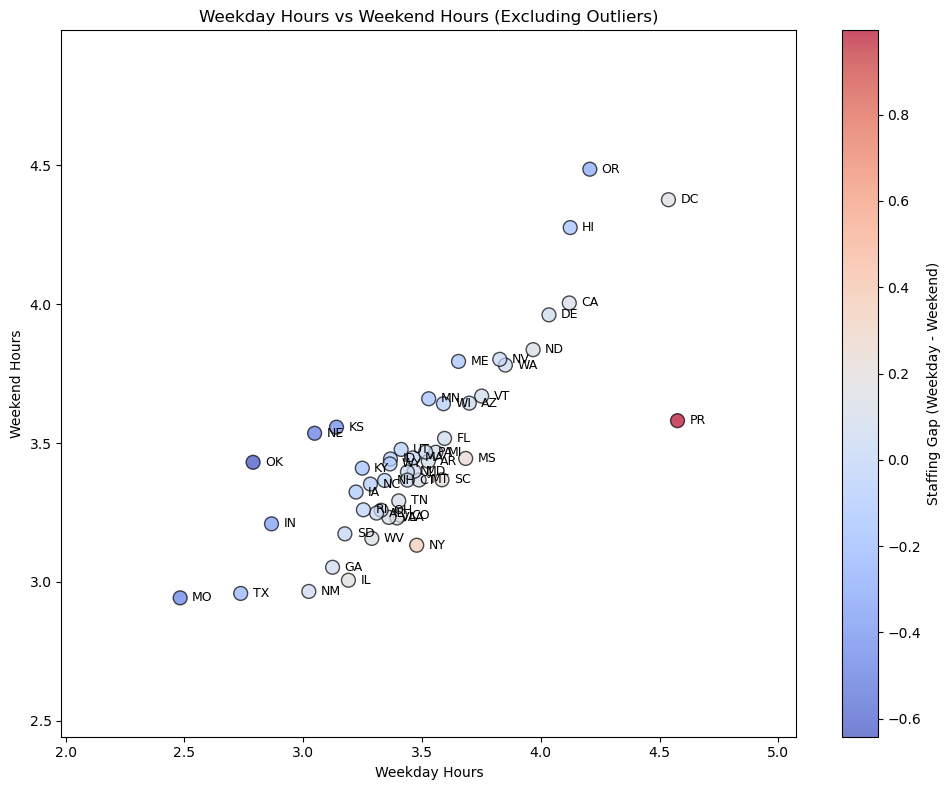

In [53]:
import seaborn as sns

# Identify outliers (weekend and weekday hours > 6)
outlier_condition = (data['weekday_hours'] > 6) | (data['weekend_hours'] > 6)
data_no_outliers = data[~outlier_condition]

# Set up the figure size for better clarity
plt.figure(figsize=(10, 8))

# Create the scatter plot with color mapping for staffing gap
scatter = plt.scatter(data_no_outliers['weekday_hours'], data_no_outliers['weekend_hours'], 
                      c=data_no_outliers['staffing_gap'], cmap='coolwarm', 
                      s=100, edgecolors='black', alpha=0.7)

# Add title, labels, and color bar
plt.title('Weekday Hours vs Weekend Hours (Excluding Outliers)')
plt.xlabel('Weekday Hours')
plt.ylabel('Weekend Hours')

# Add color bar to indicate staffing gap
cbar = plt.colorbar(scatter)
cbar.set_label('Staffing Gap (Weekday - Weekend)')

# Add labels for each state to avoid overlap
for i in range(len(data_no_outliers)):
    plt.text(data_no_outliers['weekday_hours'].iloc[i] + 0.05, 
             data_no_outliers['weekend_hours'].iloc[i], 
             data_no_outliers['state'].iloc[i], fontsize=9, ha='left', va='center')

# Adjust the axis to fit the data better, limiting large outliers
plt.xlim(data_no_outliers['weekday_hours'].min() - 0.5, data_no_outliers['weekday_hours'].max() + 0.5)
plt.ylim(data_no_outliers['weekend_hours'].min() - 0.5, data_no_outliers['weekend_hours'].max() + 0.5)

# Show the plot
plt.tight_layout()
plt.show()

/tmp/ipykernel_12134/2862460453.py:15: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  data = pd.read_sql(query, conn)


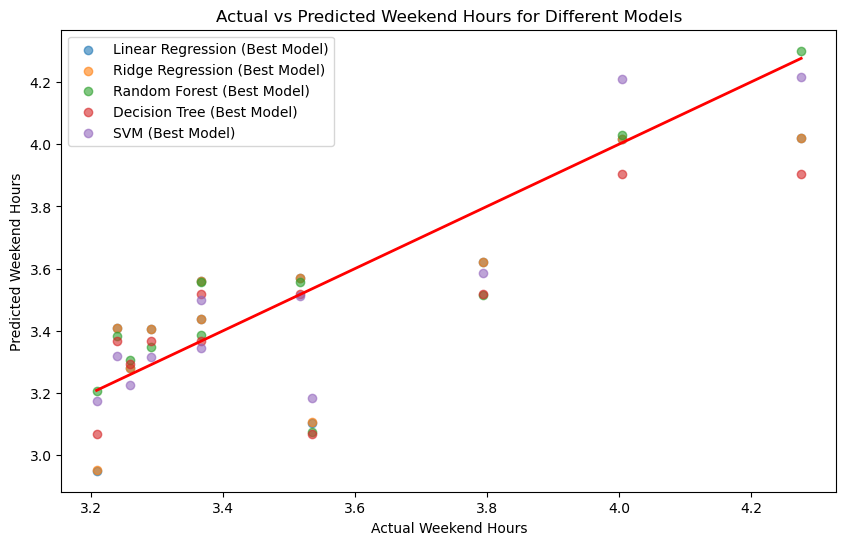

Linear Regression: Best Params = {}, MSE = 0.0395, R² Score = 0.6437
Ridge Regression: Best Params = {'model__alpha': 0.1}, MSE = 0.0395, R² Score = 0.6444
Random Forest: Best Params = {'model__max_depth': 5, 'model__n_estimators': 50}, MSE = 0.0322, R² Score = 0.7096
Decision Tree: Best Params = {'model__max_depth': 10, 'model__min_samples_split': 10}, MSE = 0.0460, R² Score = 0.5856
SVM: Best Params = {'model__C': 1, 'model__epsilon': 0.2}, MSE = 0.0217, R² Score = 0.8042


In [108]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Assuming the data is already fetched from the database
query = 'select * from nursing_db.weekday_weekend_query'
data = pd.read_sql(query, conn)

# Define features (X) and target (y)
X = data[['weekday_hours']]  # Feature
y = data['weekend_hours']  # Target variable

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define models with hyperparameter tuning
models = {
    "Linear Regression": Pipeline([
        ('scaler', StandardScaler()),
        ('model', LinearRegression())
    ]),
    "Ridge Regression": Pipeline([
        ('scaler', StandardScaler()),
        ('model', Ridge())
    ]),
    "Random Forest": Pipeline([
        ('scaler', StandardScaler()),
        ('model', RandomForestRegressor(random_state=42))
    ]),
    "Decision Tree": Pipeline([
        ('scaler', StandardScaler()),
        ('model', DecisionTreeRegressor(random_state=42))
    ]),
    "SVM": Pipeline([
        ('scaler', StandardScaler()),
        ('model', SVR())
    ])
}

# Hyperparameter grids for tuning
param_grids = {
    "Linear Regression": {},
    "Ridge Regression": {
        'model__alpha': [0.1, 1, 10, 100]
    },
    "Random Forest": {
        'model__n_estimators': [50, 100, 200],
        'model__max_depth': [5, 10, 20]
    },
    "Decision Tree": {
        'model__max_depth': [5, 10, 20, None],
        'model__min_samples_split': [2, 5, 10]
    },
    "SVM": {
        'model__C': [0.1, 1, 10],
        'model__epsilon': [0.01, 0.1, 0.2]
    }
}

# Initialize GridSearchCV for each model
results = {}
plt.figure(figsize=(10, 6))

for name, model in models.items():
    # Perform GridSearchCV
    grid_search = GridSearchCV(model, param_grids[name], cv=5, n_jobs=-1, scoring='neg_mean_squared_error')
    grid_search.fit(X_train, y_train)

    # Best model and parameters
    best_model = grid_search.best_estimator_
    best_params = grid_search.best_params_
    y_pred = best_model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results[name] = {"Best Params": best_params, "MSE": mse, "R² Score": r2}

    # Scatter plot for comparison
    plt.scatter(y_test, y_pred, label=f"{name} (Best Model)", alpha=0.6)

# Plot formatting
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2)  # Perfect prediction line
plt.xlabel('Actual Weekend Hours')
plt.ylabel('Predicted Weekend Hours')
plt.title('Actual vs Predicted Weekend Hours for Different Models')
plt.legend()
plt.show()

# Print best model performance
for model, metrics in results.items():
    print(f"{model}: Best Params = {metrics['Best Params']}, MSE = {metrics['MSE']:.4f}, R² Score = {metrics['R² Score']:.4f}")


/tmp/ipykernel_12134/3065043735.py:15: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  data = pd.read_sql(query, conn)


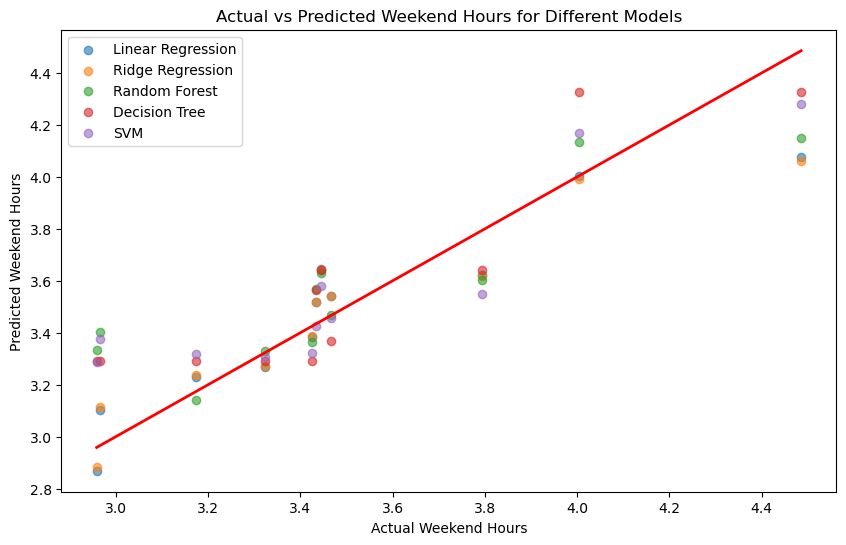

Linear Regression: MSE = 0.0261, R² Score = 0.8597
Ridge Regression: MSE = 0.0270, R² Score = 0.8544
Random Forest: MSE = 0.0503, R² Score = 0.7292
Decision Tree: MSE = 0.0427, R² Score = 0.7702
SVM: MSE = 0.0414, R² Score = 0.7772


In [110]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Assuming the data is already fetched from the database
query = 'select * from nursing_db.weekday_weekend_query order by weekday_hours desc'
data = pd.read_sql(query, conn)

# Define features (X) and target (y)
X = data[['weekday_hours']]  # Feature
y = data['weekend_hours']  # Target variable

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define models with hyperparameter tuning
models = {
    "Linear Regression": Pipeline([
        ('scaler', StandardScaler()),
        ('model', LinearRegression())
    ]),
    "Ridge Regression": Pipeline([
        ('scaler', StandardScaler()),
        ('model', Ridge(alpha=1.0))
    ]),
    "Random Forest": Pipeline([
        ('scaler', StandardScaler()),
        ('model', RandomForestRegressor(n_estimators=200, max_depth=10, random_state=42))
    ]),
    "Decision Tree": Pipeline([
        ('scaler', StandardScaler()),
        ('model', DecisionTreeRegressor(max_depth=5, random_state=42))
    ]),
    "SVM": Pipeline([
        ('scaler', StandardScaler()),
        ('model', SVR(kernel='rbf', C=10, epsilon=0.1))
    ])
}

# Train and evaluate each model
results = {}
plt.figure(figsize=(10, 6))

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results[name] = {"MSE": mse, "R² Score": r2}
    
    # Scatter plot
    plt.scatter(y_test, y_pred, label=name, alpha=0.6)

# Plot formatting
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2)  # Perfect prediction line
plt.xlabel('Actual Weekend Hours')
plt.ylabel('Predicted Weekend Hours')
plt.title('Actual vs Predicted Weekend Hours for Different Models')
plt.legend()
plt.show()

# Print model performance
for model, metrics in results.items():
    print(f"{model}: MSE = {metrics['MSE']:.4f}, R² Score = {metrics['R² Score']:.4f}")


In [11]:
query = 'select * from nursing_db.facility_rating_query'
data = pd.read_sql(query, conn)
print(data)

/tmp/ipykernel_8242/384205196.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  data = pd.read_sql(query, conn)


   overall_rating  avg_rn_hours_per_resident  avg_lpn_hours_per_resident  \
0             5.0                   0.727783                    0.801725   
1             4.0                   0.496070                    0.801698   
2             3.0                   0.432837                    0.785488   
3             2.0                   0.394337                    0.778773   
4             1.0                   0.331916                    0.764348   

   avg_cna_hours_per_resident  
0                    2.388678  
1                    2.181024  
2                    2.095433  
3                    2.012499  
4                    1.907102  


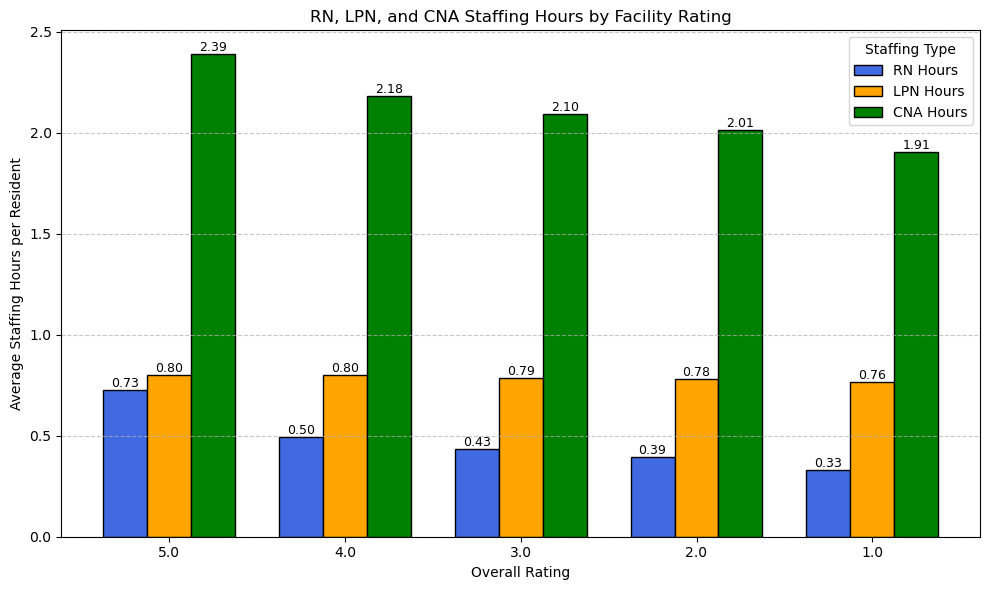

In [73]:
import numpy as np

# Setting up the plot size
plt.figure(figsize=(10, 6))

# X-axis positions for the bars
x = np.arange(len(data))

# Bar width (for grouped bars)
bar_width = 0.25

# Plotting bars for RN, LPN, and CNA hours
plt.bar(x - bar_width, data['avg_rn_hours_per_resident'], bar_width, label='RN Hours', color='royalblue', edgecolor='black')
plt.bar(x, data['avg_lpn_hours_per_resident'], bar_width, label='LPN Hours', color='orange', edgecolor='black')
plt.bar(x + bar_width, data['avg_cna_hours_per_resident'], bar_width, label='CNA Hours', color='green', edgecolor='black')

# Adding labels and title
plt.xlabel('Overall Rating')
plt.ylabel('Average Staffing Hours per Resident')
plt.title('RN, LPN, and CNA Staffing Hours by Facility Rating')

# Set x-ticks to be the overall ratings and adjust labels for clarity
plt.xticks(x, data['overall_rating'])

# Adding a legend to differentiate between RN, LPN, and CNA bars
plt.legend(title="Staffing Type")

# Add labels for average hours on top of each bar
for bar in rn_bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, f'{yval:.2f}', ha='center', va='bottom', fontsize=9)

for bar in lpn_bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, f'{yval:.2f}', ha='center', va='bottom', fontsize=9)

for bar in cna_bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, f'{yval:.2f}', ha='center', va='bottom', fontsize=9)

# Show grid lines for better readability
plt.grid(True, axis='y', linestyle='--', alpha=0.7)

# Display the plot
plt.tight_layout()
plt.show()